In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from data_loader import data_label_split
from data_loader import generate_data_set
from data_loader import dmso_taxol_ProfileBag
from data_loader import data_normalization
from deepset_exp import mini_noise_signal_cv
from deepset_exp import train
from deepset_exp import test

from model import SmallDeepSet
from model import FullDeepSet
from model import profile_AttSet

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize

import torch
import torch.utils.data as D 
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F

In [2]:
mini_data = pd.read_csv("mini_moa_data_drop_NA.csv",index_col=0)

In [3]:
sf_drop_NA_data = mini_data[["compound", "concentration",
                                "moa", "row ID", "Iteration (#2)", "COND",
                               "AreaShape_Area_Nuclei", "AreaShape_Compactness_Nuclei"]]
bagData = dmso_taxol_ProfileBag(mini_data, 200, 50, 5, 0.5, "taxol", "DMSO", 0.5)
dataloader = D.DataLoader(bagData, batch_size=1, shuffle=True)

In [3]:
# X,y = data_label_split(mini_data)
# data = pd.concat([pd.DataFrame(normalize(X), columns = X.columns), y], axis=1, sort = False )

data = data_normalization(mini_data)


In [173]:
x = iter(dataloader).next()[0]#.shape

In [176]:
y_prob, y_hat = model(x.float().cuda())

# Deep Set Model

In [6]:
# full_deepset = SmallDeepSet().cuda()
# optimizer = optim.Adam(full_deepset.parameters(), lr=0.0005, betas=(0.9, 0.999), weight_decay=10e-5)

In [6]:
start = 90
end = 91
# data = mini_data
num_bag = 100
bag_size_mean = 200
bag_size_std = 10
treatment = "taxol"
control = "DMSO"
model = FullDeepSet("mean").cuda()
# optimizer = optimizer
splits = 3
epochs = 20

In [4]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')


183,558 total parameters.
183,558 training parameters.


In [17]:
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=10e-5)

In [18]:
results = mini_noise_signal_cv(start, end, data, num_bag,
                               bag_size_mean, bag_size_std, treatment, control, model, optimizer, splits, epochs)



training at different percent:   0%|          | 0/1 [00:00<?, ?it/s]
3 fold cross validation: 0it [00:00, ?it/s]

For 0 epoch: 0it [00:00, ?it/s]

For 0 epoch: 1it [00:00,  2.68it/s]

For 0 epoch: 9it [00:00,  3.77it/s]

For 0 epoch: 17it [00:00,  5.27it/s]

For 0 epoch: 26it [00:00,  7.32it/s]

For 0 epoch: 32it [00:00,  9.94it/s]

For 0 epoch: 41it [00:00, 13.53it/s]

For 0 epoch: 50it [00:01, 18.11it/s]

For 0 epoch: 66it [00:01, 55.31it/s]


For 1 epoch: 0it [00:00, ?it/s]

For 1 epoch: 11it [00:00, 109.50it/s]

Epoch: 0, Loss: 0.6756, Train error: 0.4091




For 1 epoch: 23it [00:00, 112.34it/s]

For 1 epoch: 33it [00:00, 101.26it/s]

For 1 epoch: 40it [00:00, 82.91it/s] 

For 1 epoch: 47it [00:00, 77.29it/s]

For 1 epoch: 57it [00:00, 80.93it/s]

For 1 epoch: 66it [00:00, 85.67it/s]


For 2 epoch: 0it [00:00, ?it/s]

For 2 epoch: 10it [00:00, 92.45it/s]

Epoch: 1, Loss: 0.3605, Train error: 0.1212




For 2 epoch: 17it [00:00, 84.29it/s]

For 2 epoch: 26it [00:00, 84.09it/s]

For 2 epoch: 35it [00:00, 83.57it/s]

For 2 epoch: 44it [00:00, 83.97it/s]

For 2 epoch: 54it [00:00, 86.59it/s]

For 2 epoch: 66it [00:00, 83.72it/s]


For 3 epoch: 0it [00:00, ?it/s]

For 3 epoch: 9it [00:00, 87.38it/s]

Epoch: 2, Loss: 0.0378, Train error: 0.0000




For 3 epoch: 18it [00:00, 87.41it/s]

For 3 epoch: 28it [00:00, 89.75it/s]

For 3 epoch: 38it [00:00, 90.48it/s]

For 3 epoch: 48it [00:00, 92.07it/s]

For 3 epoch: 66it [00:00, 92.58it/s]


For 4 epoch: 0it [00:00, ?it/s]

For 4 epoch: 7it [00:00, 63.34it/s]

Epoch: 3, Loss: 0.0063, Train error: 0.0000




For 4 epoch: 14it [00:00, 64.36it/s]

For 4 epoch: 22it [00:00, 66.28it/s]

For 4 epoch: 29it [00:00, 65.70it/s]

For 4 epoch: 35it [00:00, 63.69it/s]

For 4 epoch: 41it [00:00, 59.70it/s]

For 4 epoch: 48it [00:00, 62.35it/s]

For 4 epoch: 56it [00:00, 65.13it/s]

For 4 epoch: 66it [00:01, 64.98it/s]


For 5 epoch: 0it [00:00, ?it/s]

For 5 epoch: 8it [00:00, 75.81it/s]

Epoch: 4, Loss: 0.0038, Train error: 0.0000




For 5 epoch: 15it [00:00, 71.29it/s]

For 5 epoch: 24it [00:00, 75.31it/s]

For 5 epoch: 30it [00:00, 68.57it/s]

For 5 epoch: 36it [00:00, 63.70it/s]

For 5 epoch: 42it [00:00, 62.03it/s]

For 5 epoch: 51it [00:00, 67.45it/s]

For 5 epoch: 58it [00:00, 66.64it/s]

For 5 epoch: 66it [00:00, 68.08it/s]


For 6 epoch: 0it [00:00, ?it/s]

For 6 epoch: 8it [00:00, 72.97it/s]

Epoch: 5, Loss: 0.0024, Train error: 0.0000




For 6 epoch: 17it [00:00, 73.05it/s]

For 6 epoch: 24it [00:00, 71.12it/s]

For 6 epoch: 32it [00:00, 72.41it/s]

For 6 epoch: 40it [00:00, 71.55it/s]

For 6 epoch: 47it [00:00, 69.88it/s]

For 6 epoch: 54it [00:00, 62.78it/s]

For 6 epoch: 66it [00:00, 69.10it/s]


For 7 epoch: 0it [00:00, ?it/s]

For 7 epoch: 7it [00:00, 63.31it/s]

Epoch: 6, Loss: 0.0017, Train error: 0.0000




For 7 epoch: 14it [00:00, 64.00it/s]

For 7 epoch: 21it [00:00, 64.46it/s]

For 7 epoch: 32it [00:00, 71.70it/s]

For 7 epoch: 40it [00:00, 72.83it/s]

For 7 epoch: 49it [00:00, 76.42it/s]

For 7 epoch: 57it [00:00, 73.05it/s]

For 7 epoch: 66it [00:00, 74.59it/s]


For 8 epoch: 0it [00:00, ?it/s]

For 8 epoch: 9it [00:00, 87.83it/s]

Epoch: 7, Loss: 0.0014, Train error: 0.0000




For 8 epoch: 17it [00:00, 83.64it/s]

For 8 epoch: 25it [00:00, 80.70it/s]

For 8 epoch: 34it [00:00, 81.03it/s]

For 8 epoch: 41it [00:00, 75.79it/s]

For 8 epoch: 48it [00:00, 70.95it/s]

For 8 epoch: 57it [00:00, 75.53it/s]

For 8 epoch: 66it [00:00, 76.83it/s]


For 9 epoch: 0it [00:00, ?it/s]

For 9 epoch: 9it [00:00, 86.36it/s]

Epoch: 8, Loss: 0.0011, Train error: 0.0000




For 9 epoch: 15it [00:00, 74.69it/s]

For 9 epoch: 23it [00:00, 74.22it/s]

For 9 epoch: 32it [00:00, 78.22it/s]

For 9 epoch: 42it [00:00, 82.34it/s]

For 9 epoch: 49it [00:00, 77.23it/s]

For 9 epoch: 66it [00:00, 80.74it/s]


For 10 epoch: 0it [00:00, ?it/s]

For 10 epoch: 10it [00:00, 96.76it/s]

Epoch: 9, Loss: 0.0010, Train error: 0.0000




For 10 epoch: 20it [00:00, 94.58it/s]

For 10 epoch: 31it [00:00, 97.43it/s]

For 10 epoch: 41it [00:00, 95.31it/s]

For 10 epoch: 52it [00:00, 98.45it/s]

For 10 epoch: 66it [00:00, 97.48it/s]


For 11 epoch: 0it [00:00, ?it/s]

For 11 epoch: 9it [00:00, 87.45it/s]

Epoch: 10, Loss: 0.0009, Train error: 0.0000




For 11 epoch: 18it [00:00, 86.51it/s]

For 11 epoch: 27it [00:00, 87.09it/s]

For 11 epoch: 36it [00:00, 86.85it/s]

For 11 epoch: 43it [00:00, 74.50it/s]

For 11 epoch: 52it [00:00, 78.05it/s]

For 11 epoch: 66it [00:00, 84.73it/s]


For 12 epoch: 0it [00:00, ?it/s]

For 12 epoch: 11it [00:00, 106.60it/s]

Epoch: 11, Loss: 0.0008, Train error: 0.0000




For 12 epoch: 21it [00:00, 102.44it/s]

For 12 epoch: 31it [00:00, 98.71it/s] 

For 12 epoch: 41it [00:00, 98.42it/s]

For 12 epoch: 52it [00:00, 98.72it/s]

For 12 epoch: 66it [00:00, 96.87it/s]


For 13 epoch: 0it [00:00, ?it/s]

For 13 epoch: 10it [00:00, 95.06it/s]

Epoch: 12, Loss: 0.0008, Train error: 0.0000




For 13 epoch: 20it [00:00, 94.32it/s]

For 13 epoch: 30it [00:00, 94.86it/s]

For 13 epoch: 39it [00:00, 93.31it/s]

For 13 epoch: 50it [00:00, 97.16it/s]

For 13 epoch: 66it [00:00, 95.47it/s]


For 14 epoch: 0it [00:00, ?it/s]

For 14 epoch: 10it [00:00, 97.51it/s]

Epoch: 13, Loss: 0.0007, Train error: 0.0000




For 14 epoch: 20it [00:00, 97.61it/s]

For 14 epoch: 31it [00:00, 98.45it/s]

For 14 epoch: 42it [00:00, 99.72it/s]

For 14 epoch: 52it [00:00, 96.95it/s]

For 14 epoch: 66it [00:00, 98.84it/s]


For 15 epoch: 0it [00:00, ?it/s]

For 15 epoch: 11it [00:00, 100.71it/s]

Epoch: 14, Loss: 0.0007, Train error: 0.0000




For 15 epoch: 20it [00:00, 93.89it/s] 

For 15 epoch: 30it [00:00, 94.67it/s]

For 15 epoch: 39it [00:00, 92.76it/s]

For 15 epoch: 49it [00:00, 93.45it/s]

For 15 epoch: 66it [00:00, 92.55it/s]


For 16 epoch: 0it [00:00, ?it/s]

For 16 epoch: 10it [00:00, 94.37it/s]

Epoch: 15, Loss: 0.0006, Train error: 0.0000




For 16 epoch: 19it [00:00, 92.57it/s]

For 16 epoch: 25it [00:00, 78.69it/s]

For 16 epoch: 31it [00:00, 71.21it/s]

For 16 epoch: 39it [00:00, 71.93it/s]

For 16 epoch: 48it [00:00, 76.37it/s]

For 16 epoch: 66it [00:00, 81.64it/s]


For 17 epoch: 0it [00:00, ?it/s]

For 17 epoch: 11it [00:00, 102.55it/s]

Epoch: 16, Loss: 0.0007, Train error: 0.0000




For 17 epoch: 21it [00:00, 98.85it/s] 

For 17 epoch: 31it [00:00, 96.39it/s]

For 17 epoch: 42it [00:00, 98.90it/s]

For 17 epoch: 52it [00:00, 98.16it/s]

For 17 epoch: 66it [00:00, 95.59it/s]


For 18 epoch: 0it [00:00, ?it/s]

For 18 epoch: 11it [00:00, 105.87it/s]

Epoch: 17, Loss: 0.0006, Train error: 0.0000




For 18 epoch: 20it [00:00, 99.74it/s] 

For 18 epoch: 30it [00:00, 97.15it/s]

For 18 epoch: 40it [00:00, 97.36it/s]

For 18 epoch: 51it [00:00, 99.63it/s]

For 18 epoch: 66it [00:00, 94.47it/s] 


For 19 epoch: 0it [00:00, ?it/s]

For 19 epoch: 6it [00:00, 59.92it/s]

Epoch: 18, Loss: 0.0006, Train error: 0.0000




For 19 epoch: 16it [00:00, 66.17it/s]

For 19 epoch: 24it [00:00, 68.73it/s]

For 19 epoch: 32it [00:00, 69.19it/s]

For 19 epoch: 38it [00:00, 62.31it/s]

For 19 epoch: 44it [00:00, 61.41it/s]

For 19 epoch: 52it [00:00, 63.51it/s]

For 19 epoch: 58it [00:00, 57.49it/s]

For 19 epoch: 66it [00:01, 64.16it/s]


Epoch: 19, Loss: 0.0006, Train error: 0.0000



3 fold cross validation: 1it [00:16, 16.93s/it]

For 0 epoch: 0it [00:00, ?it/s]

For 0 epoch: 7it [00:00, 66.34it/s]

For 0 epoch: 17it [00:00, 73.31it/s]

For 0 epoch: 25it [00:00, 73.94it/s]

For 0 epoch: 36it [00:00, 80.14it/s]

For 0 epoch: 46it [00:00, 83.04it/s]

For 0 epoch: 56it [00:00, 86.41it/s]

For 0 epoch: 66it [00:00, 87.67it/s]


For 1 epoch: 0it [00:00, ?it/s]

For 1 epoch: 10it [00:00, 95.29it/s]

Epoch: 0, Loss: 0.0005, Train error: 0.0000




For 1 epoch: 19it [00:00, 91.46it/s]

For 1 epoch: 27it [00:00, 86.32it/s]

For 1 epoch: 38it [00:00, 89.88it/s]

For 1 epoch: 48it [00:00, 92.15it/s]

For 1 epoch: 56it [00:00, 81.06it/s]

For 1 epoch: 66it [00:00, 78.62it/s]


For 2 epoch: 0it [00:00, ?it/s]

For 2 epoch: 8it [00:00, 79.82it/s]

Epoch: 1, Loss: 0.0006, Train error: 0.0000




For 2 epoch: 16it [00:00, 76.96it/s]

For 2 epoch: 22it [00:00, 69.67it/s]

For 2 epoch: 30it [00:00, 70.23it/s]

For 2 epoch: 37it [00:00, 69.03it/s]

For 2 epoch: 46it [00:00, 72.80it/s]

For 2 epoch: 53it [00:00, 67.09it/s]

For 2 epoch: 66it [00:00, 69.80it/s]


For 3 epoch: 0it [00:00, ?it/s]

For 3 epoch: 10it [00:00, 97.60it/s]

Epoch: 2, Loss: 0.0005, Train error: 0.0000




For 3 epoch: 19it [00:00, 93.30it/s]

For 3 epoch: 29it [00:00, 93.99it/s]

For 3 epoch: 36it [00:00, 81.61it/s]

For 3 epoch: 43it [00:00, 73.40it/s]

For 3 epoch: 53it [00:00, 78.32it/s]

For 3 epoch: 66it [00:00, 82.90it/s]


For 4 epoch: 0it [00:00, ?it/s]

For 4 epoch: 7it [00:00, 68.74it/s]

Epoch: 3, Loss: 0.0006, Train error: 0.0000




For 4 epoch: 13it [00:00, 65.00it/s]

For 4 epoch: 21it [00:00, 68.74it/s]

For 4 epoch: 28it [00:00, 67.08it/s]

For 4 epoch: 37it [00:00, 72.54it/s]

For 4 epoch: 44it [00:00, 68.67it/s]

For 4 epoch: 51it [00:00, 63.59it/s]

For 4 epoch: 57it [00:00, 62.00it/s]

For 4 epoch: 66it [00:01, 64.28it/s]


For 5 epoch: 0it [00:00, ?it/s]

For 5 epoch: 7it [00:00, 68.18it/s]

Epoch: 4, Loss: 0.0006, Train error: 0.0000




For 5 epoch: 14it [00:00, 65.00it/s]

For 5 epoch: 20it [00:00, 61.81it/s]

For 5 epoch: 27it [00:00, 63.60it/s]

For 5 epoch: 33it [00:00, 60.26it/s]

For 5 epoch: 38it [00:00, 54.22it/s]

For 5 epoch: 46it [00:00, 58.32it/s]

For 5 epoch: 55it [00:00, 64.73it/s]

For 5 epoch: 66it [00:01, 65.87it/s]


For 6 epoch: 0it [00:00, ?it/s]

For 6 epoch: 10it [00:00, 94.10it/s]

Epoch: 5, Loss: 0.0006, Train error: 0.0000




For 6 epoch: 19it [00:00, 92.64it/s]

For 6 epoch: 28it [00:00, 89.96it/s]

For 6 epoch: 35it [00:00, 80.86it/s]

For 6 epoch: 42it [00:00, 75.55it/s]

For 6 epoch: 49it [00:00, 65.36it/s]

For 6 epoch: 57it [00:00, 67.55it/s]

For 6 epoch: 66it [00:00, 74.10it/s]


For 7 epoch: 0it [00:00, ?it/s]

For 7 epoch: 8it [00:00, 73.21it/s]

Epoch: 6, Loss: 0.0005, Train error: 0.0000




For 7 epoch: 16it [00:00, 74.53it/s]

For 7 epoch: 22it [00:00, 68.48it/s]

For 7 epoch: 29it [00:00, 65.25it/s]

For 7 epoch: 35it [00:00, 61.70it/s]

For 7 epoch: 43it [00:00, 65.73it/s]

For 7 epoch: 50it [00:00, 65.23it/s]

For 7 epoch: 66it [00:00, 68.80it/s]


For 8 epoch: 0it [00:00, ?it/s]

For 8 epoch: 8it [00:00, 75.97it/s]

Epoch: 7, Loss: 0.0005, Train error: 0.0000




For 8 epoch: 16it [00:00, 76.89it/s]

For 8 epoch: 25it [00:00, 78.73it/s]

For 8 epoch: 33it [00:00, 77.94it/s]

For 8 epoch: 41it [00:00, 78.02it/s]

For 8 epoch: 50it [00:00, 80.05it/s]

For 8 epoch: 58it [00:00, 76.14it/s]

For 8 epoch: 66it [00:00, 76.58it/s]


For 9 epoch: 0it [00:00, ?it/s]

For 9 epoch: 7it [00:00, 68.38it/s]

Epoch: 8, Loss: 0.0006, Train error: 0.0000




For 9 epoch: 15it [00:00, 69.51it/s]

For 9 epoch: 26it [00:00, 76.76it/s]

For 9 epoch: 34it [00:00, 74.69it/s]

For 9 epoch: 41it [00:00, 69.75it/s]

For 9 epoch: 48it [00:00, 68.64it/s]

For 9 epoch: 55it [00:00, 66.78it/s]

For 9 epoch: 66it [00:00, 71.20it/s]


For 10 epoch: 0it [00:00, ?it/s]

For 10 epoch: 10it [00:00, 95.47it/s]

Epoch: 9, Loss: 0.0005, Train error: 0.0000




For 10 epoch: 19it [00:00, 93.32it/s]

For 10 epoch: 25it [00:00, 73.03it/s]

For 10 epoch: 30it [00:00, 62.69it/s]

For 10 epoch: 38it [00:00, 66.92it/s]

For 10 epoch: 46it [00:00, 69.36it/s]

For 10 epoch: 54it [00:00, 70.65it/s]

For 10 epoch: 66it [00:00, 71.71it/s]


For 11 epoch: 0it [00:00, ?it/s]

For 11 epoch: 9it [00:00, 89.08it/s]

Epoch: 10, Loss: 0.0005, Train error: 0.0000




For 11 epoch: 18it [00:00, 88.55it/s]

For 11 epoch: 28it [00:00, 90.08it/s]

For 11 epoch: 37it [00:00, 87.47it/s]

For 11 epoch: 46it [00:00, 86.98it/s]

For 11 epoch: 54it [00:00, 81.66it/s]

For 11 epoch: 66it [00:00, 79.59it/s]


For 12 epoch: 0it [00:00, ?it/s]

For 12 epoch: 10it [00:00, 93.14it/s]

Epoch: 11, Loss: 0.0005, Train error: 0.0000




For 12 epoch: 19it [00:00, 89.25it/s]

For 12 epoch: 26it [00:00, 80.27it/s]

For 12 epoch: 33it [00:00, 71.16it/s]

For 12 epoch: 39it [00:00, 65.71it/s]

For 12 epoch: 47it [00:00, 68.64it/s]

For 12 epoch: 54it [00:00, 64.04it/s]

For 12 epoch: 66it [00:00, 68.14it/s]


For 13 epoch: 0it [00:00, ?it/s]

For 13 epoch: 7it [00:00, 66.72it/s]

Epoch: 12, Loss: 0.0006, Train error: 0.0000




For 13 epoch: 14it [00:00, 67.31it/s]

For 13 epoch: 21it [00:00, 67.77it/s]

For 13 epoch: 30it [00:00, 72.61it/s]

For 13 epoch: 40it [00:00, 79.02it/s]

For 13 epoch: 49it [00:00, 80.51it/s]

For 13 epoch: 66it [00:00, 82.66it/s]


For 14 epoch: 0it [00:00, ?it/s]

For 14 epoch: 10it [00:00, 97.08it/s]

Epoch: 13, Loss: 0.0005, Train error: 0.0000




For 14 epoch: 18it [00:00, 82.95it/s]

For 14 epoch: 26it [00:00, 78.69it/s]

For 14 epoch: 35it [00:00, 79.71it/s]

For 14 epoch: 44it [00:00, 81.16it/s]

For 14 epoch: 55it [00:00, 86.76it/s]

For 14 epoch: 66it [00:00, 80.04it/s]


For 15 epoch: 0it [00:00, ?it/s]

For 15 epoch: 11it [00:00, 100.51it/s]

Epoch: 14, Loss: 0.0005, Train error: 0.0000




For 15 epoch: 19it [00:00, 93.28it/s] 

For 15 epoch: 30it [00:00, 95.94it/s]

For 15 epoch: 40it [00:00, 94.51it/s]

For 15 epoch: 49it [00:00, 91.47it/s]

For 15 epoch: 66it [00:00, 89.48it/s]


For 16 epoch: 0it [00:00, ?it/s]

For 16 epoch: 9it [00:00, 77.90it/s]

Epoch: 15, Loss: 0.0005, Train error: 0.0000




For 16 epoch: 16it [00:00, 74.28it/s]

For 16 epoch: 22it [00:00, 67.72it/s]

For 16 epoch: 29it [00:00, 67.96it/s]

For 16 epoch: 38it [00:00, 73.14it/s]

For 16 epoch: 47it [00:00, 75.55it/s]

For 16 epoch: 56it [00:00, 77.77it/s]

For 16 epoch: 66it [00:00, 76.72it/s]


For 17 epoch: 0it [00:00, ?it/s]

For 17 epoch: 10it [00:00, 84.86it/s]

Epoch: 16, Loss: 0.0005, Train error: 0.0000




For 17 epoch: 18it [00:00, 82.69it/s]

For 17 epoch: 26it [00:00, 79.79it/s]

For 17 epoch: 35it [00:00, 79.34it/s]

For 17 epoch: 42it [00:00, 75.60it/s]

For 17 epoch: 50it [00:00, 75.18it/s]

For 17 epoch: 66it [00:00, 76.52it/s]


For 18 epoch: 0it [00:00, ?it/s]

For 18 epoch: 9it [00:00, 83.21it/s]

Epoch: 17, Loss: 0.0005, Train error: 0.0000




For 18 epoch: 18it [00:00, 84.08it/s]

For 18 epoch: 26it [00:00, 82.03it/s]

For 18 epoch: 34it [00:00, 81.37it/s]

For 18 epoch: 42it [00:00, 80.12it/s]

For 18 epoch: 50it [00:00, 77.85it/s]

For 18 epoch: 66it [00:00, 79.09it/s]


For 19 epoch: 0it [00:00, ?it/s]

For 19 epoch: 9it [00:00, 81.70it/s]

Epoch: 18, Loss: 0.0005, Train error: 0.0000




For 19 epoch: 14it [00:00, 67.55it/s]

For 19 epoch: 20it [00:00, 63.68it/s]

For 19 epoch: 30it [00:00, 71.03it/s]

For 19 epoch: 37it [00:00, 70.41it/s]

For 19 epoch: 44it [00:00, 65.99it/s]

For 19 epoch: 50it [00:00, 63.23it/s]

For 19 epoch: 57it [00:00, 64.32it/s]

For 19 epoch: 66it [00:01, 65.60it/s]


Epoch: 19, Loss: 0.0005, Train error: 0.0000



3 fold cross validation: 2it [00:35, 17.29s/it]

For 0 epoch: 0it [00:00, ?it/s]

For 0 epoch: 7it [00:00, 65.53it/s]

For 0 epoch: 15it [00:00, 66.87it/s]

For 0 epoch: 22it [00:00, 65.63it/s]

For 0 epoch: 29it [00:00, 66.70it/s]

For 0 epoch: 36it [00:00, 67.63it/s]

For 0 epoch: 45it [00:00, 73.04it/s]

For 0 epoch: 53it [00:00, 74.04it/s]

For 0 epoch: 66it [00:00, 74.02it/s]


For 1 epoch: 0it [00:00, ?it/s]

For 1 epoch: 8it [00:00, 75.55it/s]

Epoch: 0, Loss: 0.0007, Train error: 0.0000




For 1 epoch: 16it [00:00, 76.19it/s]

For 1 epoch: 23it [00:00, 74.03it/s]

For 1 epoch: 31it [00:00, 74.83it/s]

For 1 epoch: 44it [00:00, 85.27it/s]

For 1 epoch: 53it [00:00, 84.43it/s]

For 1 epoch: 66it [00:00, 73.82it/s]


For 2 epoch: 0it [00:00, ?it/s]

For 2 epoch: 8it [00:00, 74.02it/s]

Epoch: 1, Loss: 0.0006, Train error: 0.0000




For 2 epoch: 14it [00:00, 67.12it/s]

For 2 epoch: 20it [00:00, 62.30it/s]

For 2 epoch: 27it [00:00, 62.17it/s]

For 2 epoch: 36it [00:00, 66.57it/s]

For 2 epoch: 45it [00:00, 71.05it/s]

For 2 epoch: 56it [00:00, 78.59it/s]

For 2 epoch: 66it [00:00, 74.08it/s]


For 3 epoch: 0it [00:00, ?it/s]

For 3 epoch: 12it [00:00, 113.87it/s]

Epoch: 2, Loss: 0.0005, Train error: 0.0000




For 3 epoch: 23it [00:00, 109.18it/s]

For 3 epoch: 30it [00:00, 92.21it/s] 

For 3 epoch: 37it [00:00, 83.73it/s]

For 3 epoch: 44it [00:00, 78.99it/s]

For 3 epoch: 55it [00:00, 86.10it/s]

For 3 epoch: 66it [00:00, 88.33it/s]


For 4 epoch: 0it [00:00, ?it/s]

For 4 epoch: 9it [00:00, 87.35it/s]

Epoch: 3, Loss: 0.0005, Train error: 0.0000




For 4 epoch: 18it [00:00, 86.83it/s]

For 4 epoch: 27it [00:00, 87.12it/s]

For 4 epoch: 35it [00:00, 81.04it/s]

For 4 epoch: 42it [00:00, 76.31it/s]

For 4 epoch: 50it [00:00, 75.73it/s]

For 4 epoch: 66it [00:00, 76.59it/s]


For 5 epoch: 0it [00:00, ?it/s]

For 5 epoch: 10it [00:00, 96.58it/s]

Epoch: 4, Loss: 0.0005, Train error: 0.0000




For 5 epoch: 21it [00:00, 98.35it/s]

For 5 epoch: 30it [00:00, 93.98it/s]

For 5 epoch: 39it [00:00, 91.83it/s]

For 5 epoch: 49it [00:00, 91.38it/s]

For 5 epoch: 57it [00:00, 82.27it/s]

For 5 epoch: 66it [00:00, 84.26it/s]


For 6 epoch: 0it [00:00, ?it/s]

For 6 epoch: 11it [00:00, 100.57it/s]

Epoch: 5, Loss: 0.0005, Train error: 0.0000




For 6 epoch: 21it [00:00, 99.45it/s] 

For 6 epoch: 30it [00:00, 96.36it/s]

For 6 epoch: 40it [00:00, 97.18it/s]

For 6 epoch: 50it [00:00, 97.58it/s]

For 6 epoch: 66it [00:00, 97.75it/s]


For 7 epoch: 0it [00:00, ?it/s]

For 7 epoch: 9it [00:00, 80.15it/s]

Epoch: 6, Loss: 0.0006, Train error: 0.0000




For 7 epoch: 16it [00:00, 74.23it/s]

For 7 epoch: 20it [00:00, 58.96it/s]

For 7 epoch: 27it [00:00, 60.68it/s]

For 7 epoch: 34it [00:00, 62.99it/s]

For 7 epoch: 41it [00:00, 64.06it/s]

For 7 epoch: 48it [00:00, 63.80it/s]

For 7 epoch: 57it [00:00, 69.55it/s]

For 7 epoch: 66it [00:00, 67.47it/s]


For 8 epoch: 0it [00:00, ?it/s]

For 8 epoch: 6it [00:00, 59.39it/s]

Epoch: 7, Loss: 0.0004, Train error: 0.0000




For 8 epoch: 13it [00:00, 62.13it/s]

For 8 epoch: 21it [00:00, 64.95it/s]

For 8 epoch: 27it [00:00, 63.11it/s]

For 8 epoch: 35it [00:00, 65.77it/s]

For 8 epoch: 44it [00:00, 70.13it/s]

For 8 epoch: 53it [00:00, 74.99it/s]

For 8 epoch: 66it [00:00, 71.65it/s]


For 9 epoch: 0it [00:00, ?it/s]

For 9 epoch: 7it [00:00, 59.61it/s]

Epoch: 8, Loss: 0.0006, Train error: 0.0000




For 9 epoch: 16it [00:00, 66.26it/s]

For 9 epoch: 26it [00:00, 73.15it/s]

For 9 epoch: 36it [00:00, 77.62it/s]

For 9 epoch: 45it [00:00, 80.10it/s]

For 9 epoch: 53it [00:00, 80.05it/s]

For 9 epoch: 66it [00:00, 81.49it/s]


For 10 epoch: 0it [00:00, ?it/s]

For 10 epoch: 10it [00:00, 93.06it/s]

Epoch: 9, Loss: 0.0004, Train error: 0.0000




For 10 epoch: 20it [00:00, 94.03it/s]

For 10 epoch: 30it [00:00, 93.17it/s]

For 10 epoch: 40it [00:00, 92.91it/s]

For 10 epoch: 50it [00:00, 93.38it/s]

For 10 epoch: 58it [00:00, 86.98it/s]

For 10 epoch: 66it [00:00, 84.40it/s]


For 11 epoch: 0it [00:00, ?it/s]

For 11 epoch: 7it [00:00, 63.43it/s]

Epoch: 10, Loss: 0.0006, Train error: 0.0000




For 11 epoch: 14it [00:00, 64.76it/s]

For 11 epoch: 19it [00:00, 58.61it/s]

For 11 epoch: 25it [00:00, 58.77it/s]

For 11 epoch: 32it [00:00, 60.09it/s]

For 11 epoch: 41it [00:00, 65.49it/s]

For 11 epoch: 47it [00:00, 55.16it/s]

For 11 epoch: 53it [00:00, 56.23it/s]

For 11 epoch: 66it [00:01, 59.97it/s]


For 12 epoch: 0it [00:00, ?it/s]

For 12 epoch: 9it [00:00, 82.77it/s]

Epoch: 11, Loss: 0.0004, Train error: 0.0000




For 12 epoch: 18it [00:00, 81.18it/s]

For 12 epoch: 27it [00:00, 81.85it/s]

For 12 epoch: 33it [00:00, 72.92it/s]

For 12 epoch: 39it [00:00, 68.35it/s]

For 12 epoch: 48it [00:00, 69.87it/s]

For 12 epoch: 55it [00:00, 69.01it/s]

For 12 epoch: 66it [00:00, 71.19it/s]


For 13 epoch: 0it [00:00, ?it/s]

For 13 epoch: 9it [00:00, 86.26it/s]

Epoch: 12, Loss: 0.0004, Train error: 0.0000




For 13 epoch: 18it [00:00, 84.71it/s]

For 13 epoch: 27it [00:00, 84.10it/s]

For 13 epoch: 36it [00:00, 85.07it/s]

For 13 epoch: 46it [00:00, 86.83it/s]

For 13 epoch: 56it [00:00, 90.37it/s]

For 13 epoch: 66it [00:00, 87.28it/s]


For 14 epoch: 0it [00:00, ?it/s]

For 14 epoch: 6it [00:00, 56.28it/s]

Epoch: 13, Loss: 0.0004, Train error: 0.0000




For 14 epoch: 14it [00:00, 60.60it/s]

For 14 epoch: 24it [00:00, 67.55it/s]

For 14 epoch: 34it [00:00, 73.38it/s]

For 14 epoch: 43it [00:00, 77.12it/s]

For 14 epoch: 53it [00:00, 81.99it/s]

For 14 epoch: 66it [00:00, 83.76it/s]


For 15 epoch: 0it [00:00, ?it/s]

For 15 epoch: 7it [00:00, 69.00it/s]

Epoch: 14, Loss: 0.0008, Train error: 0.0000




For 15 epoch: 14it [00:00, 68.10it/s]

For 15 epoch: 25it [00:00, 76.20it/s]

For 15 epoch: 34it [00:00, 77.56it/s]

For 15 epoch: 45it [00:00, 83.13it/s]

For 15 epoch: 66it [00:00, 89.61it/s]


For 16 epoch: 0it [00:00, ?it/s]

For 16 epoch: 11it [00:00, 108.61it/s]

Epoch: 15, Loss: 0.0002, Train error: 0.0000




For 16 epoch: 20it [00:00, 101.31it/s]

For 16 epoch: 31it [00:00, 101.93it/s]

For 16 epoch: 42it [00:00, 102.31it/s]

For 16 epoch: 50it [00:00, 91.63it/s] 

For 16 epoch: 66it [00:00, 98.77it/s]


For 17 epoch: 0it [00:00, ?it/s]

For 17 epoch: 12it [00:00, 112.49it/s]

Epoch: 16, Loss: 0.0004, Train error: 0.0000




For 17 epoch: 19it [00:00, 92.70it/s] 

For 17 epoch: 29it [00:00, 93.27it/s]

For 17 epoch: 39it [00:00, 92.32it/s]

For 17 epoch: 47it [00:00, 85.62it/s]

For 17 epoch: 54it [00:00, 77.61it/s]

For 17 epoch: 66it [00:00, 75.88it/s]


For 18 epoch: 0it [00:00, ?it/s]

For 18 epoch: 7it [00:00, 62.11it/s]

Epoch: 17, Loss: 0.0004, Train error: 0.0000




For 18 epoch: 14it [00:00, 63.51it/s]

For 18 epoch: 23it [00:00, 68.13it/s]

For 18 epoch: 31it [00:00, 69.63it/s]

For 18 epoch: 40it [00:00, 73.59it/s]

For 18 epoch: 50it [00:00, 79.67it/s]

For 18 epoch: 66it [00:00, 80.03it/s]


For 19 epoch: 0it [00:00, ?it/s]

For 19 epoch: 9it [00:00, 83.29it/s]

Epoch: 18, Loss: 0.0005, Train error: 0.0000




For 19 epoch: 17it [00:00, 81.46it/s]

For 19 epoch: 27it [00:00, 85.52it/s]

For 19 epoch: 36it [00:00, 85.45it/s]

For 19 epoch: 46it [00:00, 87.97it/s]

For 19 epoch: 66it [00:00, 91.16it/s]


Epoch: 19, Loss: 0.0004, Train error: 0.0000



3 fold cross validation: 3it [00:52, 17.38s/it]
training at different percent:   0%|          | 0/1 [00:52<?, ?it/s]


In [246]:
acc_control, acc_treat, pred_score_control, pred_score_treat = test(sf_deepset, dataloader)

In [253]:
(mean_control_accuracy, std_control_accuracy, 
            mean_treat_accuracy, std_treat_accuracy, 
            mean_pred_score_control, std_pred_score_control,
            mean_pred_score_treatment, std_pred_score_treatment) = sf_results

# Plot

In [4]:
def plot_ds_acc(path, file_name):
    table = pd.read_csv(path + file_name, index_col=0)
    table = table.sort_index()
    z_score = 1-3*(table["std_pred_score_treatment"]+table["std_pred_score_control"])/(np.abs(table["mean_pred_score_treatment"]-table["mean_pred_score_control"]))

    model_name = "_".join(file_name.split("_")[0:2])
    feature_size = 481

    plt.figure(figsize=(14, 5))
    ax = plt.subplot(1,2,1)
    plt.plot([i/100 for i in range(5,96,5)], table["mean_accuracy"], '-')
    plt.fill_between([i/100 for i in range(5,96,5)], 
                     (table["mean_accuracy"])-table["std_accuracy"], table["mean_accuracy"]+table["std_accuracy"], alpha=0.2)
    ax.set_title("Accuracy score of %s, %s cells, %s features"%(model_name, 100, feature_size))

    ax = plt.subplot(1,2,2)
    plt.plot([i/100 for i in range(5,96,5)], z_score, '-')
    ax.set_title("Z_score of %s, %s cells, %s features"%(model_name, 100, feature_size))

    plt.savefig("%s_sample%s_feature%s.png" %(model_name, 10000, feature_size))

KeyError: 'mean_accuracy'

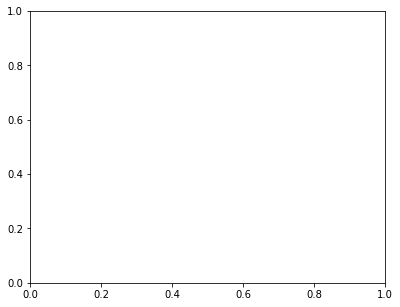

In [5]:
path = "./"
file_name = "RandomForestClassifier_sample500_feature481.csv"

plot_ds_acc(path,file_name)

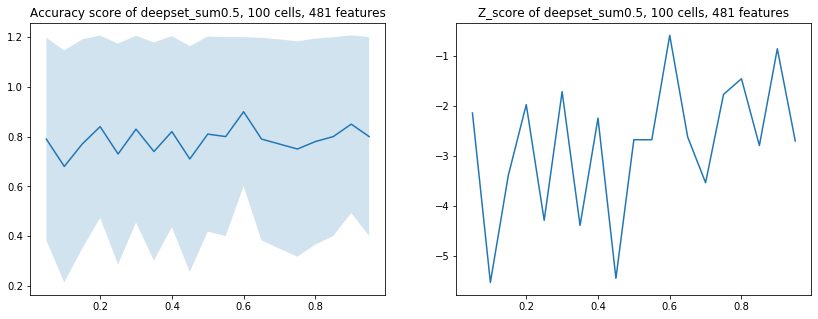

In [12]:
path = "./deepset_result_Nov1/"
file_name = "deepset_sum0.5_bags100_bagsize100_feature481.csv"

plot_ds_acc(path,file_name)

# AttentionSet Model

In [3]:
start = 90
end = 91
# data = mini_data
num_bag = 100
bag_size_mean = 200
bag_size_std = 10
treatment = "taxol"
control = "DMSO"
model = profile_AttSet(481).cuda()#FullDeepSet("mean").cuda()
# optimizer = optimizer
splits = 3
epochs = 20

In [8]:
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=10e-5)

In [ ]:
model

In [9]:
results = mini_noise_signal_cv(start, end, data, num_bag,
                               bag_size_mean, bag_size_std, 
                               treatment, control, model, 
                               optimizer, splits, epochs)

training at different percent:   0%|          | 0/1 [00:00<?, ?it/s]
3 fold cross validation: 0it [00:00, ?it/s]

Epoch: 0, Loss: 0.6145, Train error: 0.3030
Epoch: 1, Loss: 0.1944, Train error: 0.0455
Epoch: 2, Loss: 0.0228, Train error: 0.0000
Epoch: 3, Loss: 0.0078, Train error: 0.0000
Epoch: 4, Loss: 0.0030, Train error: 0.0000
Epoch: 5, Loss: 0.0013, Train error: 0.0000
Epoch: 6, Loss: 0.0008, Train error: 0.0000
Epoch: 7, Loss: 0.0005, Train error: 0.0000
Epoch: 8, Loss: 0.0005, Train error: 0.0000
Epoch: 9, Loss: 0.0004, Train error: 0.0000
Epoch: 10, Loss: 0.0003, Train error: 0.0000
Epoch: 11, Loss: 0.0003, Train error: 0.0000
Epoch: 12, Loss: 0.0003, Train error: 0.0000
Epoch: 13, Loss: 0.0003, Train error: 0.0000
Epoch: 14, Loss: 0.0003, Train error: 0.0000
Epoch: 15, Loss: 0.0003, Train error: 0.0000
Epoch: 16, Loss: 0.0003, Train error: 0.0000
Epoch: 17, Loss: 0.0003, Train error: 0.0000
Epoch: 18, Loss: 0.0003, Train error: 0.0000
Epoch: 19, Loss: 0.0002, Train error: 0.0000



3 fold cross validation: 1it [00:16, 16.51s/it]

Epoch: 0, Loss: 0.0002, Train error: 0.0000
Epoch: 1, Loss: 0.0002, Train error: 0.0000
Epoch: 2, Loss: 0.0002, Train error: 0.0000
Epoch: 3, Loss: 0.0002, Train error: 0.0000
Epoch: 4, Loss: 0.0002, Train error: 0.0000
Epoch: 5, Loss: 0.0003, Train error: 0.0000
Epoch: 6, Loss: 0.0002, Train error: 0.0000
Epoch: 7, Loss: 0.0002, Train error: 0.0000
Epoch: 8, Loss: 0.0003, Train error: 0.0000
Epoch: 9, Loss: 0.0003, Train error: 0.0000
Epoch: 10, Loss: 0.0002, Train error: 0.0000
Epoch: 11, Loss: 0.0003, Train error: 0.0000
Epoch: 12, Loss: 0.0002, Train error: 0.0000
Epoch: 13, Loss: 0.0003, Train error: 0.0000
Epoch: 14, Loss: 0.0002, Train error: 0.0000
Epoch: 15, Loss: 0.0003, Train error: 0.0000
Epoch: 16, Loss: 0.0002, Train error: 0.0000
Epoch: 17, Loss: 0.0003, Train error: 0.0000
Epoch: 18, Loss: 0.0003, Train error: 0.0000
Epoch: 19, Loss: 0.0003, Train error: 0.0000



3 fold cross validation: 2it [00:33, 16.58s/it]

Epoch: 0, Loss: 0.0002, Train error: 0.0000
Epoch: 1, Loss: 0.0002, Train error: 0.0000
Epoch: 2, Loss: 0.0003, Train error: 0.0000
Epoch: 3, Loss: 0.0002, Train error: 0.0000
Epoch: 4, Loss: 0.0003, Train error: 0.0000
Epoch: 5, Loss: 0.0002, Train error: 0.0000
Epoch: 6, Loss: 0.0002, Train error: 0.0000
Epoch: 7, Loss: 0.0002, Train error: 0.0000
Epoch: 8, Loss: 0.0002, Train error: 0.0000
Epoch: 9, Loss: 0.0002, Train error: 0.0000
Epoch: 10, Loss: 0.0002, Train error: 0.0000
Epoch: 11, Loss: 0.0002, Train error: 0.0000
Epoch: 12, Loss: 0.0002, Train error: 0.0000
Epoch: 13, Loss: 0.0002, Train error: 0.0000
Epoch: 14, Loss: 0.0002, Train error: 0.0000
Epoch: 15, Loss: 0.0003, Train error: 0.0000
Epoch: 16, Loss: 0.0002, Train error: 0.0000
Epoch: 17, Loss: 0.0002, Train error: 0.0000
Epoch: 18, Loss: 0.0002, Train error: 0.0000
Epoch: 19, Loss: 0.0002, Train error: 0.0000



3 fold cross validation: 3it [00:48, 16.07s/it]
training at different percent:   0%|          | 0/1 [00:48<?, ?it/s]


In [165]:
profile_model_attset = profile_AttSet(2)

In [9]:
dic = {}
# Set different percentage of treatment v.s. control 
for j in tqdm(range(start, end, 5), desc = "training at different percent"):
    X, y = data_label_split(data)
    y = y["compound"]

    acc_control_list = []
    acc_treat_list = []
    pred_score_control_list = []
    pred_score_treat_list = []
    # Stratified K fold 
    skf = StratifiedKFold(n_splits = splits)
    for i, (train_index, test_index) in tqdm(enumerate(skf.split(X, y)), desc="%d fold cross validation"%splits):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
        X_train = pd.concat([X_train, y_train], axis=1, sort=False)
        X_test = pd.concat([X_test, y_test], axis=1, sort=False)

        # Redefine dataloader and train model at each fold
        train_dataset = dmso_taxol_ProfileBag(X_train, int(num_bag*(splits-1)/splits), bag_size_mean, bag_size_std, j/100, treatment, control, 0.5)
        valida_dataset = dmso_taxol_ProfileBag(X_test, int(num_bag/splits), bag_size_mean, bag_size_std, j/100, treatment, control, 0.5)
        train_loader = D.DataLoader(train_dataset, batch_size=1, shuffle=True)
        valida_loader = D.DataLoader(valida_dataset, batch_size=1, shuffle=True)
        acc_control, acc_treat, pred_score_control, pred_score_treat = test(model, valida_loader)
        

Control accuracy:0.000, Treat accuracy:1.000, overally accuray:0.485
Control accuracy:0.000, Treat accuracy:1.000, overally accuray:0.485
Control accuracy:0.000, Treat accuracy:1.000, overally accuray:0.485




In [19]:
len(acc_control),len(acc_treat)

(17, 16)

In [23]:
def get_taxol_perc(l):
    count = 0
    for i in range(len(l)):
        if l[i]=="taxol":
            count+=1
    print(count/len(l))
    

In [22]:

["taxol","DMSO"] == "taxol"

False

In [25]:
for i in range(len(valida_dataset)):
    get_taxol_perc(valida_dataset[i][1][1])

0.8979591836734694
0.8994708994708994
0.8985507246376812
0.8990384615384616
0.8970588235294118
0.9
0.9
0.8963730569948186
0.8994708994708994
0.8979591836734694
0.8986175115207373
0.8974358974358975
0.8958333333333334
0.8958333333333334
0.8958333333333334
0.8983957219251337
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [57]:
table = pd.read_csv(path + file_name, index_col=0)
table = table.sort_index()

In [ ]:
table.iloc[]

In [58]:
table

,mean_accuracy,std_accuracy,mean_control_accuracy,std_control_accuracy,mean_treat_accuracy,std_treat_accuracy,mean_pred_score_control,std_pred_score_control,mean_pred_score_treatment,std_pred_score_treatment
0.05,0.80,0.400000,0.88,0.324962,0.72,0.448999,0.141478,0.277232,0.712987,0.387560
0.10,0.89,0.312890,0.90,0.300000,0.88,0.324962,0.134525,0.247329,0.842480,0.296975
0.15,0.92,0.271293,0.96,0.195959,0.88,0.324962,0.034166,0.132680,0.844991,0.318048
0.20,0.80,0.400000,0.84,0.366606,0.76,0.427083,0.155384,0.333898,0.754050,0.352207
0.25,0.74,0.438634,0.94,0.237487,0.54,0.498397,0.069832,0.199288,0.540951,0.434158
0.30,0.73,0.443959,0.90,0.300000,0.56,0.496387,0.086292,0.242811,0.553302,0.458849
0.35,0.76,0.427083,0.90,0.300000,0.62,0.485386,0.089969,0.240103,0.568509,0.433161
0.40,0.67,0.470213,0.92,0.271293,0.42,0.493559,0.084601,0.227860,0.419830,0.464556
0.45,0.70,0.458258,0.98,0.140000,0.42,0.493559,0.026933,0.140980,0.412991,0.485577
0.50,0.67,0.470213,0.96,0.195959,0.38,0.485386,0.039382,0.192817,0.366484,0.470740


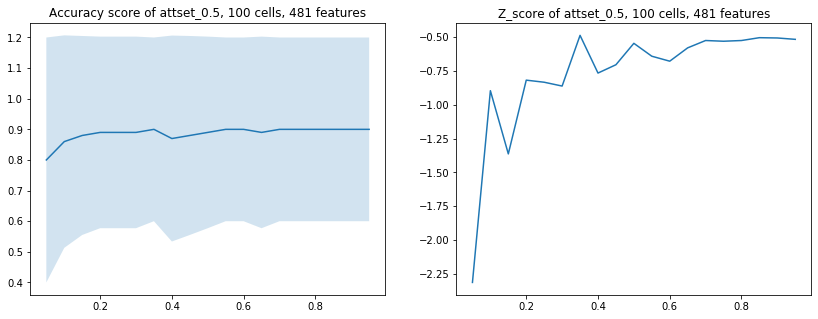

In [13]:
path = "./"
file_name = "attset_0.5_bags100_bagsize100_feature481.csv"

plot_ds_acc(path,file_name)

In [92]:
torch.tensor([1,2])

tensor([1, 2])

In [95]:

torch.rand(8, 1, 28, 28).shape

torch.Size([8, 1, 28, 28])

In [ ]:
x = x.squeeze(0)

H = self.feature_extractor_part1(x)
H = H.view(-1, 50 * 4 * 4)
H = self.feature_extractor_part2(H)  # NxL

A = self.attention(H)  # NxK
A = torch.transpose(A, 1, 0)  # KxN
A = F.softmax(A, dim=1)  # softmax over N

M = torch.mm(A, H)  # KxL

Y_prob = self.classifier(M)
Y_hat = torch.ge(Y_prob, 0.5.float()
                         
self.attention = nn.Sequential(
            nn.Linear(self.L, self.D),
            nn.Tanh(),
            nn.Linear(self.D, self.K)
        )

self.classifier = nn.Sequential(
    nn.Linear(self.L*self.K, 1),
    nn.Sigmoid()
)

In [109]:
torch.rand(8, 1, 28, 28).squeeze(0).shape

torch.Size([8, 1, 28, 28])

In [121]:
H.view(-1, 50 * 4 * 4).shape

torch.Size([8, 800])

In [118]:
nn.Sequential(
            nn.Linear(50 * 4 * 4, 500),
            nn.ReLU(),
        )(H.view(-1, 50 * 4 * 4)).shape

torch.Size([8, 500])